In [1]:
%matplotlib inline
import platform
print('the python version is: ' + platform.python_version())
import findspark
findspark.init()
import pyspark
from pyspark import SparkContext

the python version is: 3.6.3


In [2]:
from pyspark.ml.clustering import KMeans
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import DoubleType, StructType, StructField, StringType

In [3]:
# create explicit spark context 
spark = SparkSession.builder.appName("PythonKMeansIris").getOrCreate()

Have a look into the input file first manually (use editor or command on shell). Use the 'csv' function of the read class to read the data and complete schema by hand.
Define a VectorAssembler and transform the input DataFrame into an dataset.

In [4]:
# generate DataFrame instead of RDD, use DataFrameReader class to parse csv input
# have a look to iris.csv first
df=spark.read.csv("../data/iris.csv",
                    schema=StructType([StructField("sepal_length",DoubleType(),True),
                                       StructField("sepal_width",DoubleType(),True),
                                       StructField("petal_length",DoubleType(),True),
                                       StructField("petal_width",DoubleType(),True),
                                       StructField("spezies",StringType(),True)]))
#define a corresponding vector assembler
assembler = VectorAssembler(inputCols=["sepal_length",
                                 "sepal_width",
                                 "petal_length",
                                 "petal_width"],
                      outputCol="features")
#transform dataframe
dataset = assembler.transform(df)

In [5]:
assembler.explainParams()

"inputCols: input column names. (current: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])\noutputCol: output column name. (default: VectorAssembler_4e99a53ae6587e92cb1a__output, current: features)"

**Exercise:** Examine the data structure of the DataFrame by utilizing the functions 'first', 'head', 'show' and 'printSchema'. 

In [6]:
# examine spakr DataFrame
df.first()

Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa')

In [7]:
df.head(10)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=5.4, sepal_width=3.9, petal_length=1.7, petal_width=0.4, spezies='Iris-setosa'),
 Row(sepal_length=4.6, sepal_width=3.4, petal_length=1.4, petal_width=0.3, spezies='Iris-setosa'),
 Row(sepal_length=5.0, sepal_width=3.4, petal_length=1.5, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=4.4, sepal_width=2.9, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=4.9, sepal_width=3.1, petal_length=1.5, petal_width=0.1, spezies='Iris-setosa')]

In [8]:
df.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    spezies|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [9]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- spezies: string (nullable = true)



In [10]:
#RDD style
df.take(3)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, spezies='Iris-setosa')]

**Hint** Convert Spark DataFrame to Pandas dataframe object for plotting

In [11]:
pdf=df.toPandas()
pdf

,sepal_length,sepal_width,petal_length,petal_width,spezies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Text(0.5,1,'Petal')

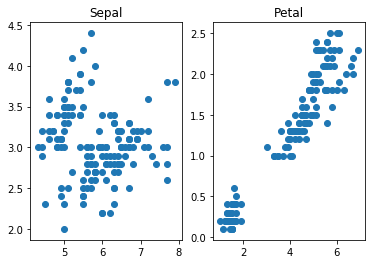

In [12]:
import matplotlib.pyplot as plt
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(pdf.sepal_length, pdf.sepal_width)
plt.title('Sepal')

#Exercise (add a second display about Petal dimensions)
plt.subplot(1,2,2)
#plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.scatter(pdf.petal_length, pdf.petal_width)
plt.title("Petal")

**Question** How many cluters would you expect in the data set

**Exercise:** Define a kmeans-Model and fit it on the dataset

In [13]:
# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(dataset)

In [14]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse = model.computeCost(dataset)
print("Within Set Sum of Squared Errors = " + str(wssse))

Within Set Sum of Squared Errors = 78.94506582597637


In [15]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
   print(center)

Cluster Centers: 
[5.88360656 2.74098361 4.38852459 1.43442623]
[6.85384615 3.07692308 5.71538462 2.05384615]
[5.006 3.418 1.464 0.244]


**Exercise:** Visualize the cluster centers in the plot.

In [16]:
sepalx=[centers[0][0], centers[1][0], centers[2][0]]
sepaly=[centers[0][1], centers[1][1], centers[2][1]]
petalx=[centers[0][2], centers[1][2], centers[2][2]]
petaly=[centers[0][3], centers[1][3], centers[2][3]]

Text(0.5,1,'Petal')

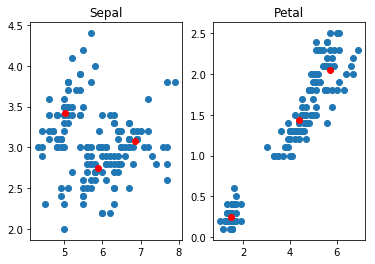

In [17]:
plt.subplot(1, 2, 1)
#convert DF to pandas-DF
plt.scatter(pdf.sepal_length, pdf.sepal_width)
plt.scatter(sepalx, sepaly, color='r')
plt.title('Sepal')

plt.subplot(1,2,2)
#plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.scatter(pdf.petal_length, pdf.petal_width)
plt.scatter(petalx, petaly, color='r')
plt.title("Petal")

In [18]:
dataset.take(5)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa', features=DenseVector([5.1, 3.5, 1.4, 0.2])),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa', features=DenseVector([4.9, 3.0, 1.4, 0.2])),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, spezies='Iris-setosa', features=DenseVector([4.7, 3.2, 1.3, 0.2])),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, spezies='Iris-setosa', features=DenseVector([4.6, 3.1, 1.5, 0.2])),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, spezies='Iris-setosa', features=DenseVector([5.0, 3.6, 1.4, 0.2]))]

Compare to truth in data set using 'spezies' variable.

In [19]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- spezies: string (nullable = true)



**Exercise:** How many 'spezies' are in the data set? Use the 'select' and 'disctict' transformations to find out.

In [20]:
df1=df.select('spezies').distinct() #take just first occurance

In [21]:
df1.take(5)

[Row(spezies='Iris-virginica'),
 Row(spezies='Iris-setosa'),
 Row(spezies='Iris-versicolor')]

In [22]:
#replace strings in Spark DataFrame for spezies with integers
from pyspark.sql.functions import *
df2 = df.withColumn('spezies', regexp_replace('spezies', 'Iris-virginica', '0')
                     ).withColumn('spezies', regexp_replace('spezies', 'Iris-setosa', '1')
                                 ).withColumn('spezies', regexp_replace('spezies', 'Iris-versicolor', '2'))
df2.take(4)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, spezies='1'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, spezies='1'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, spezies='1'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, spezies='1')]

In [23]:
#typesafe - cast the type of species directly
dfConv = df2.select(df2.spezies.cast('int').alias('spezies'))
dfConv.printSchema()
#convert to Pandas
pdfConv = dfConv.toPandas()
pdfConv

root
 |-- spezies: integer (nullable = true)



,spezies
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Text(0.5,1,'Petalal')

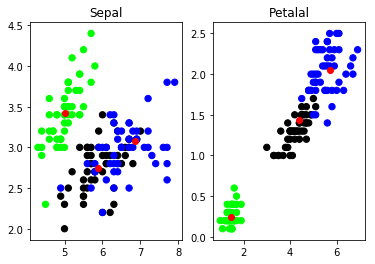

In [24]:
plt.subplot(1, 2, 1)
#convert DF to pandas-DF
import numpy as np
colormap = np.array(['blue', 'lime', 'black'])
plt.scatter(pdf.sepal_length, pdf.sepal_width, c=colormap[pdfConv.spezies], s=40)
plt.scatter(sepalx, sepaly, color='r')
plt.title('Sepal')

plt.subplot(1, 2, 2)
plt.scatter(pdf.petal_length, pdf.petal_width, c=colormap[pdfConv.spezies], s=40)
plt.scatter(petalx, petaly, color='r')
plt.title('Petalal')


In [ ]:
spark.stop()